In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import xgboost as xgb

In [2]:
from sklearn.metrics import mean_absolute_error
from datetime import date

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import matplotlib.pyplot as plt

In [5]:
# set the seed of random number generator, which is useful for creating simulations 
# or random objects that can be reproduced.
import random
SEED=3
random.seed(SEED)
np.random.seed(SEED)

In [6]:
# Load Train Data
train = pd.read_pickle('../data/processed/train_nochanel_uniqueidpos_x_envios_feateng.pkl')

In [7]:
train.shape

(11810, 94)

In [8]:
train['fecha_venta_norm'] = pd.to_datetime(train['fecha_venta_norm'])

In [9]:
train['fecha_venta_norm'] = train['fecha_venta_norm'].dt.date

In [10]:
predictors = [
    'id_pos', 
    #'canal',
    'competidores',
    'ingreso_mediana',
    'ingreso_promedio',
    'densidad_poblacional',
    'pct_0a5',
    'pct_5a9',
    'pct_10a14',
    'pct_15a19',
    'pct_20a24',
    'pct_25a29',
    'pct_30a34',
    'pct_35a39',
    'pct_40a44',
    'pct_45a49',
    'pct_50a54',
    'pct_55a59',
    'pct_60a64',
    'pct_65a69',
    'pct_70a74',
    'pct_75a79',
    'pct_80a84',
    'pct_85ainf',
    'pct_bachelors',
    'pct_doctorados',
    'pct_secundario',
    'pct_master',
    'pct_bicicleta',
    'pct_omnibus',
    'pct_subtes',
    'pct_taxi',
    'pct_caminata',
    'mediana_valor_hogar',
    #'unidades_despachadas_sum', 
    #'unidades_despachadas_max',
    #'unidades_despachadas_min', 
    #'unidades_despachadas_avg',
    #'cantidad_envios_max', 
    #'cantidad_envios_min', 
    #'cantidad_envios_avg',
    #'num_cantidad_envios', 
    #'unidades_despachadas_sum_acum', 
    #'unidades_despachadas_sum_acum_3p',
    #'unidades_despachadas_sum_acum_6p', 
    #'unidades_despachadas_max_acum', 
    #'unidades_despachadas_min_acum', 
    #'num_cantidad_envios_acum', 
    #'num_cantidad_envios_acum_3per',
    #'num_cantidad_envios_acum_6per', 
    #'diff_dtventa_dtenvio',
    'unidades_before', 
    'num_ventas_before',
    'rel_unidades_num_ventas', 
    'unidades_acum', 
    'num_ventas_acum',
    'countacum', 'unidades_mean', 
    'num_ventas_mean',
    'unidades_2time_before', 
    'unidades_diff', 
    'month',
    'diff_dtventa_dtventa_before', 
    'unidades_pend',
    
    'unidades'
]

In [11]:
train = train[predictors]

#### encode catvars

In [12]:
X, y = train.iloc[:,:-1],train.iloc[:,-1]


In [13]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Hyperparameters tuning

In [15]:
## =========================================================================================================
# 
#  Booster Parameters 
#
# n_estimators
#    - The number of sequential trees to be modeled
#    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point.
#
# max_depth [default=6]
#    - The maximum depth of a tree.
#    - Used to control over-fitting as higher depth will allow model to learn relations very pecific to a particular sample.
#    - Typical values: 3-10
#
# min_child_weight [default=1]
#    - Defines the minimum sum of weights of all observations required in a child.
#    - This is similar to min_child_leaf in GBM but not exactly.
#      This refers to min sum of weightsof observations while GBM has min number of observations.
#    - Used to control over-fitting. Higher values prevent a model from learning relations
#      which might be highly specific to the particular sample selected for a tree.
#    - Too high values can lead to under-fitting hence, it should be tuned using CV.
#
# eta : learning rate
#   - Makes the model more robust by shrinking the weights on each step
#   - Typical final values to be used: 0.01-0.2
#
# gamma [default=0]
#
#    - A node is split only when the resulting split gives a positive reduction in the loss function.
#    - Gamma specifies the minimum loss reduction required to make a split.
#    - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
#
# subsample [default=1]
#     - Denotes the fraction of observations to be randomly samples for each tree.
#     - Lower values make the algorithm more conservative and prevents overfitting but too small values
#       might lead to under-fitting.
#     - Typical values: 0.5-1
#
# colsample_bytree [default=1]
#     - Denotes the fraction of columns to be randomly samples for each tree.
#     - Typical values: 0.5-1
#
# alpha [default=0]
#     - L1 regularization term on weight (analogous to Lasso regression)
#     - Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
#
# scale_pos_weight [default=1]
#     A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
#
## ===========================================================================================================


#### Number of trees (estimators)

In [15]:
# 5 fold cross validation is more accurate than using a single validation set
cv_folds = 5
early_stopping_rounds = 50
model = xgb.XGBRegressor(seed = SEED)

In [16]:
xgb_param = model.get_xgb_params()

In [17]:
xgb_param

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 3,
 'subsample': 1,
 'verbosity': 1}

In [18]:
# To train on GPU
xgb_param['objective'] = 'reg:squarederror'
xgb_param['gpu_id'] = 0
xgb_param['max_bin'] = 16
xgb_param['tree_method'] = 'gpu_hist'
xgb_param['learning_rate'] = 0.01

In [19]:
cvresult = xgb.cv(params=xgb_param, dtrain=data_dmatrix, num_boost_round = 1000, nfold = cv_folds, metrics = 'mae', early_stopping_rounds = early_stopping_rounds, seed = SEED)
print(cvresult)
print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

     train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0         13.270283       0.042809      13.269918      0.173696
1         13.137823       0.042395      13.137299      0.174712
2         13.006891       0.042000      13.005946      0.175289
3         12.877428       0.041582      12.876074      0.176260
4         12.749518       0.041155      12.748380      0.176809
5         12.624187       0.040717      12.622948      0.178005
6         12.501445       0.040333      12.500237      0.178510
7         12.380732       0.040054      12.379788      0.179402
8         12.261437       0.039675      12.260166      0.180141
9         12.143498       0.039381      12.142421      0.181024
10        12.027044       0.039046      12.025533      0.181733
11        11.913135       0.038877      11.911434      0.183016
12        11.800483       0.038746      11.799053      0.183842
13        11.690120       0.038645      11.688620      0.185072
14        11.580843       0.038207      

In [20]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)

model.set_params(learning_rate = 0.01)
model.set_params(n_estimators=cvresult.shape[0])
model.set_params(tree_method='gpu_hist')

model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=719, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=3, silent=None, subsample=1,
       tree_method='gpu_hist', verbosity=1)

Text(0, 0.5, 'Feature Importance Score')

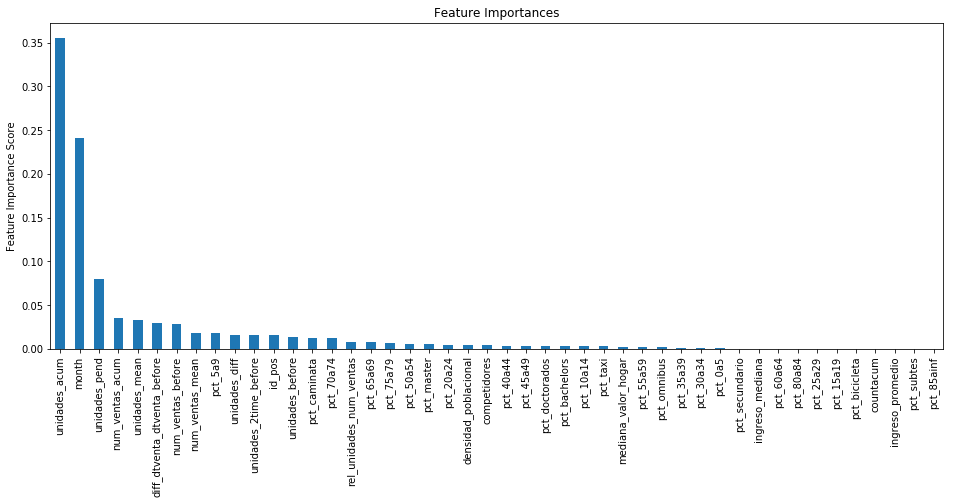

In [21]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(16,6))
plt.ylabel('Feature Importance Score')

#### max_depth & min_child_weight

In [22]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)

model.set_params(learning_rate = 0.01)
model.set_params(n_estimators=719)
model.set_params(tree_method='gpu_hist')


param_test1 = {
'max_depth': [i for i in range(2,8,1)],
'min_child_weight': [i for i in range(1,6,1)]
}

In [23]:
gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring = 'neg_mean_absolute_error',  iid = False, cv = cv_folds, verbose = 1)

In [ ]:
res =gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [26]:
#print gsearch1.grid_scores_
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 4, 'min_child_weight': 5}
-5.835551974539284


#### gamma

In [27]:
model.set_params(max_depth = 4)
model.set_params(min_child_weight = 5)

param_test2 = {
'gamma':[i/10.0 for i in range(0,5)]
}


In [28]:
gsearch2 = GridSearchCV(estimator = model, param_grid = param_test2, scoring = 'neg_mean_absolute_error',  iid = False, cv = cv_folds, verbose = 1)
gsearch2.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=7...1, scale_pos_weight=1, seed=3, silent=None, subsample=1,
       tree_method='gpu_hist', verbosity=1),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [29]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'gamma': 0.0}
-5.835551974539284


#### Recal number of trees (estimators)

In [20]:
# 5 fold cross validation is more accurate than using a single validation set
cv_folds = 5
early_stopping_rounds = 50
model = xgb.XGBRegressor(seed = SEED)

In [21]:
xgb_param = model.get_xgb_params()

In [22]:
# To train on GPU
xgb_param['objective'] = 'reg:squarederror'
xgb_param['gpu_id'] = 0
xgb_param['max_bin'] = 16
xgb_param['tree_method'] = 'gpu_hist'
xgb_param['learning_rate'] = 0.01
xgb_param['gamma'] = 0.0
xgb_param['max_depth'] = 4
xgb_param['min_child_weight'] = 5

In [23]:
cvresult = xgb.cv(params=xgb_param, dtrain=data_dmatrix, num_boost_round = 1000, nfold = cv_folds, metrics = 'mae', early_stopping_rounds = early_stopping_rounds, seed = SEED)
print(cvresult)
print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

     train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0         13.270496       0.042814      13.270195      0.173808
1         13.138217       0.042397      13.137656      0.174648
2         13.007434       0.041986      13.006519      0.175444
3         12.878197       0.041574      12.877464      0.176338
4         12.750280       0.041156      12.749369      0.177275
5         12.624343       0.040864      12.623530      0.178152
6         12.501020       0.040399      12.500252      0.179233
7         12.379957       0.040035      12.379224      0.180123
8         12.260661       0.039778      12.260046      0.181124
9         12.142946       0.039573      12.142306      0.182136
10        12.027272       0.039494      12.026823      0.183145
11        11.913259       0.039339      11.912870      0.184193
12        11.801400       0.038818      11.800974      0.185766
13        11.691305       0.038674      11.691298      0.187118
14        11.582591       0.038443      

- N_estimators = 273. Se encontro un mejor numero de estimadores

#### subsample & colsample_bytree

In [19]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)
model.set_params(tree_method='gpu_hist')
model.set_params(learning_rate = 0.01)
model.set_params(n_estimators = 273)
model.set_params(max_depth = 4)
model.set_params(min_child_weight = 5)
model.set_params(gamma = 0.0)



param_test3 = {
'subsample' : [i/10.0 for i in range(6,10)],
'colsample_bytree' : [i/10.0 for i in range(6,10)]
}


In [20]:
gsearch3 = GridSearchCV(estimator = model, param_grid = param_test3, scoring = 'neg_mean_absolute_error',  iid = False, cv = cv_folds, verbose = 1)
gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators...1, scale_pos_weight=1, seed=3, silent=None, subsample=1,
       tree_method='gpu_hist', verbosity=1),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [21]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.8}
-5.785576502213668


#### shrinking subsample & colsample_bytree

In [23]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)
model.set_params(tree_method='gpu_hist')
model.set_params(learning_rate = 0.01)
model.set_params(n_estimators = 714)
model.set_params(max_depth = 6)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.0)


param_test3 = {
'subsample' : [i/100.0 for i in range(85, 96, 1)],
'colsample_bytree' : [i/100.0 for i in range(85, 96,1)]
}

In [24]:
gsearch3 = GridSearchCV(estimator = model, param_grid = param_test3, scoring = 'neg_mean_absolute_error',  iid = False, cv = cv_folds, verbose = 1)
gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)

#### reg_alpha

In [22]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)
model.set_params(tree_method='gpu_hist')
model.set_params(learning_rate = 0.01)
model.set_params(n_estimators = 273)
model.set_params(max_depth = 4)
model.set_params(min_child_weight = 5)
model.set_params(gamma = 0.0)
model.set_params(colsample_bytree = 0.9)
model.set_params(subsample = 0.8)


param_test4 = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}



In [23]:
gsearch4 = GridSearchCV(estimator = model, param_grid = param_test4, scoring = 'neg_mean_absolute_error',  iid = False, cv = cv_folds, verbose = 1)
gsearch4.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   38.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimato... scale_pos_weight=1, seed=3, silent=None,
       subsample=0.8, tree_method='gpu_hist', verbosity=1),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [24]:
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'reg_alpha': 1}
-5.785339489671121


#### Training and Testing Model

In [25]:
model = xgb.XGBRegressor(seed = SEED)

In [25]:
model.set_params(objective = 'reg:squarederror')
model.set_params(gpu_id = 0)
model.set_params(max_bin= 16)
model.set_params(tree_method='gpu_hist')
model.set_params(learning_rate = 0.01)
model.set_params(n_estimators = 273)
model.set_params(max_depth = 4)
model.set_params(min_child_weight = 5)
model.set_params(gamma = 0.0)
model.set_params(colsample_bytree = 0.9)
model.set_params(subsample = 0.8)
model.set_params(reg_alpha = 1
                )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=273, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, seed=3, silent=None,
       subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [26]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=273, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, seed=3, silent=None,
       subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("MAE unidades: ",mean_absolute_error(y_test, y_pred))

MAE unidades:  5.602663288269882


In [29]:
print("mean unidades pred: ", np.mean(y_pred))

mean unidades pred:  12.811581


In [30]:
print("median unidades pred: ", np.median(y_pred))

median unidades pred:  8.379189


Text(0, 0.5, 'Feature Importance Score')

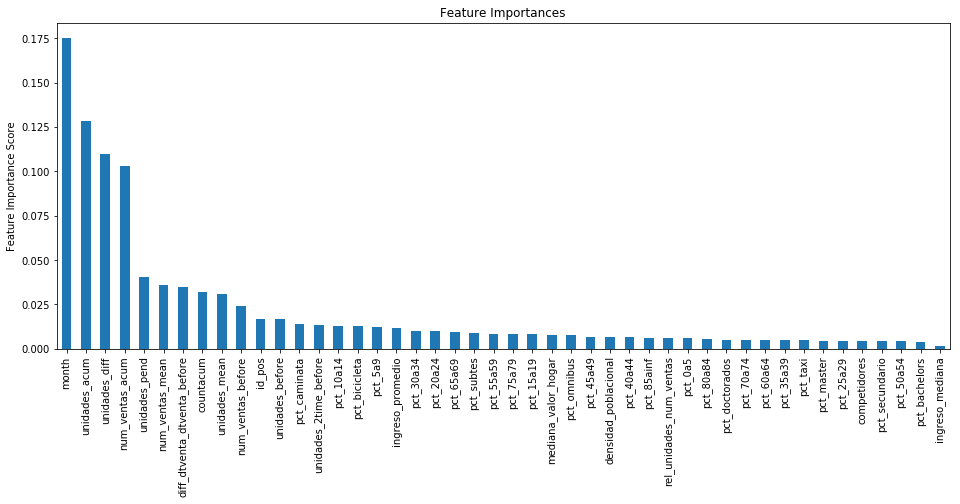

In [31]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(16,6))
plt.ylabel('Feature Importance Score')